## Import libraries


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA

## Basic summary


In [3]:
# Load the data
features_df = pd.read_csv('../features/output/features_train.csv')

print(f"Total samples: {len(features_df)}")
print(f"Class distribution:\n{features_df['label'].value_counts()}")

print(f"\nMissing values per column:\n{features_df.isnull().sum().sort_values(ascending=False)}")

Total samples: 5712
Class distribution:
label
glioma        1595
notumor       1457
pituitary     1339
meningioma    1321
Name: count, dtype: int64

Missing values per column:
area            0
perimeter       0
eccentricity    0
solidity        0
contrast        0
homogeneity     0
energy          0
correlation     0
label           0
split           0
dtype: int64


## Boxplots


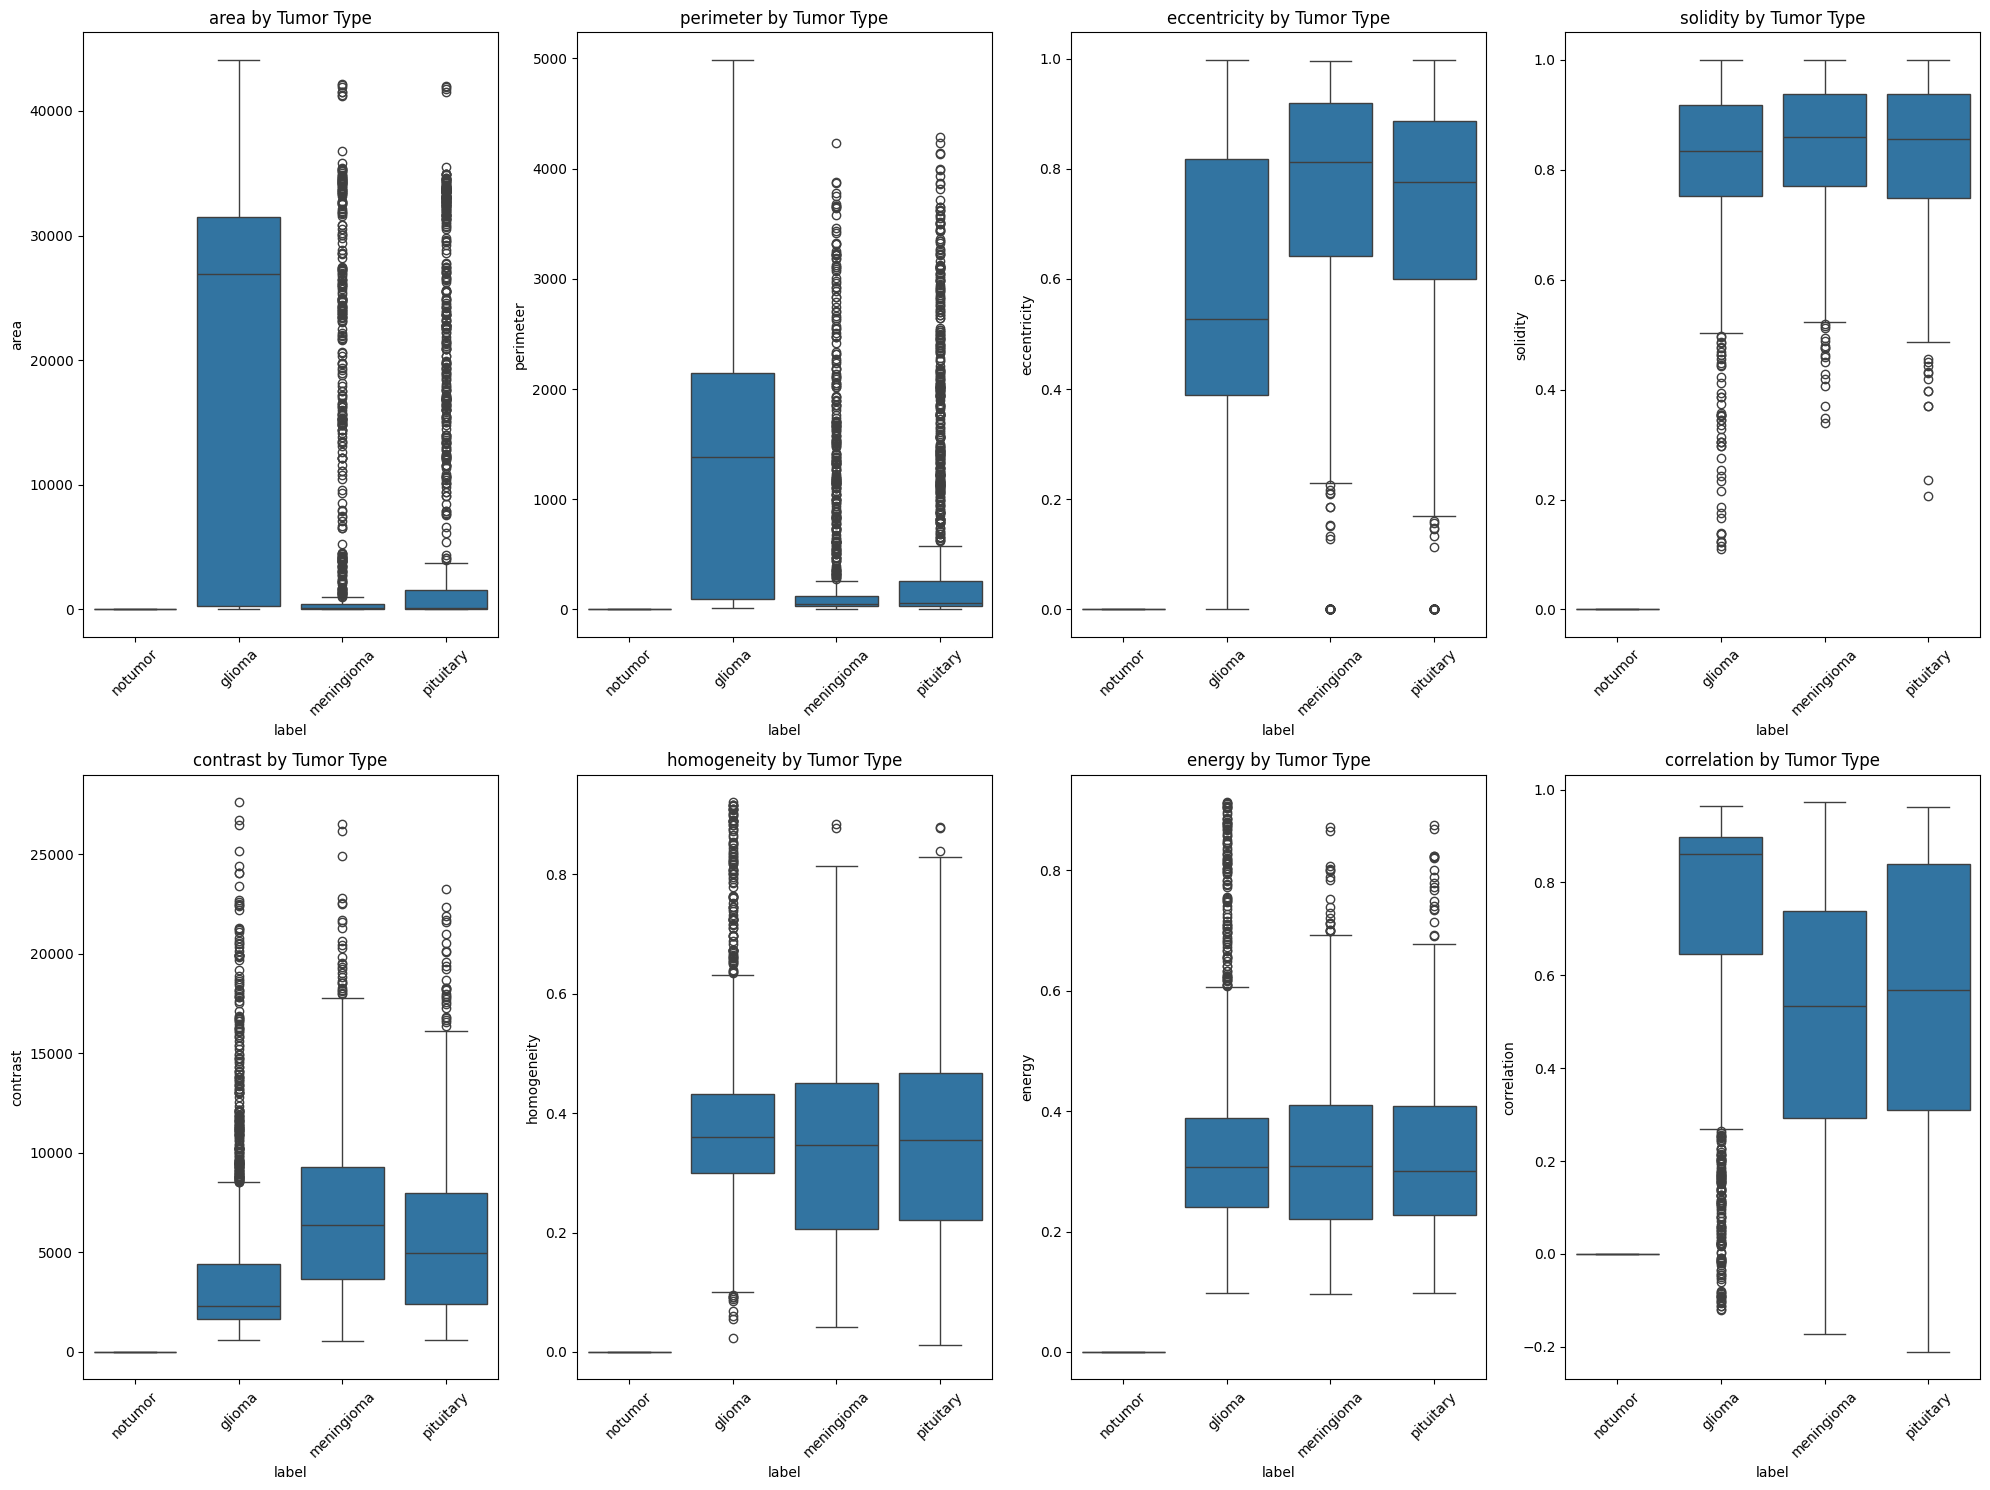

In [4]:
numerical_features = ['area', 'perimeter', 'eccentricity', 
                     'solidity', 'contrast', 'homogeneity', 'energy', 
                     'correlation']

# Create boxplots for each feature by class
fig, axes = plt.subplots(2, 4, figsize=(20, 15))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.boxplot(x='label', y=feature, data=features_df, ax=axes[i])
    axes[i].set_title(f'{feature} by Tumor Type')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('feature_boxplots.png')

Analyse:

- For area and perimeter: meningioma and pituitary type of brain tumor has extremely small areas and perimeters along with multiple large rows (outliers), while those of glioma type distributed evenly.
- For contrast, all three types of brain tumor has a lot of outliers.
- For homogenity and energy, glioma type has unusual boxplot, the outliers are focused on 0.6 to 0.8 but the interquartile range is around 0.4
- For correlation, glioma also has weird distribution unlike meningioma and pituitary


## Correlation heatmap


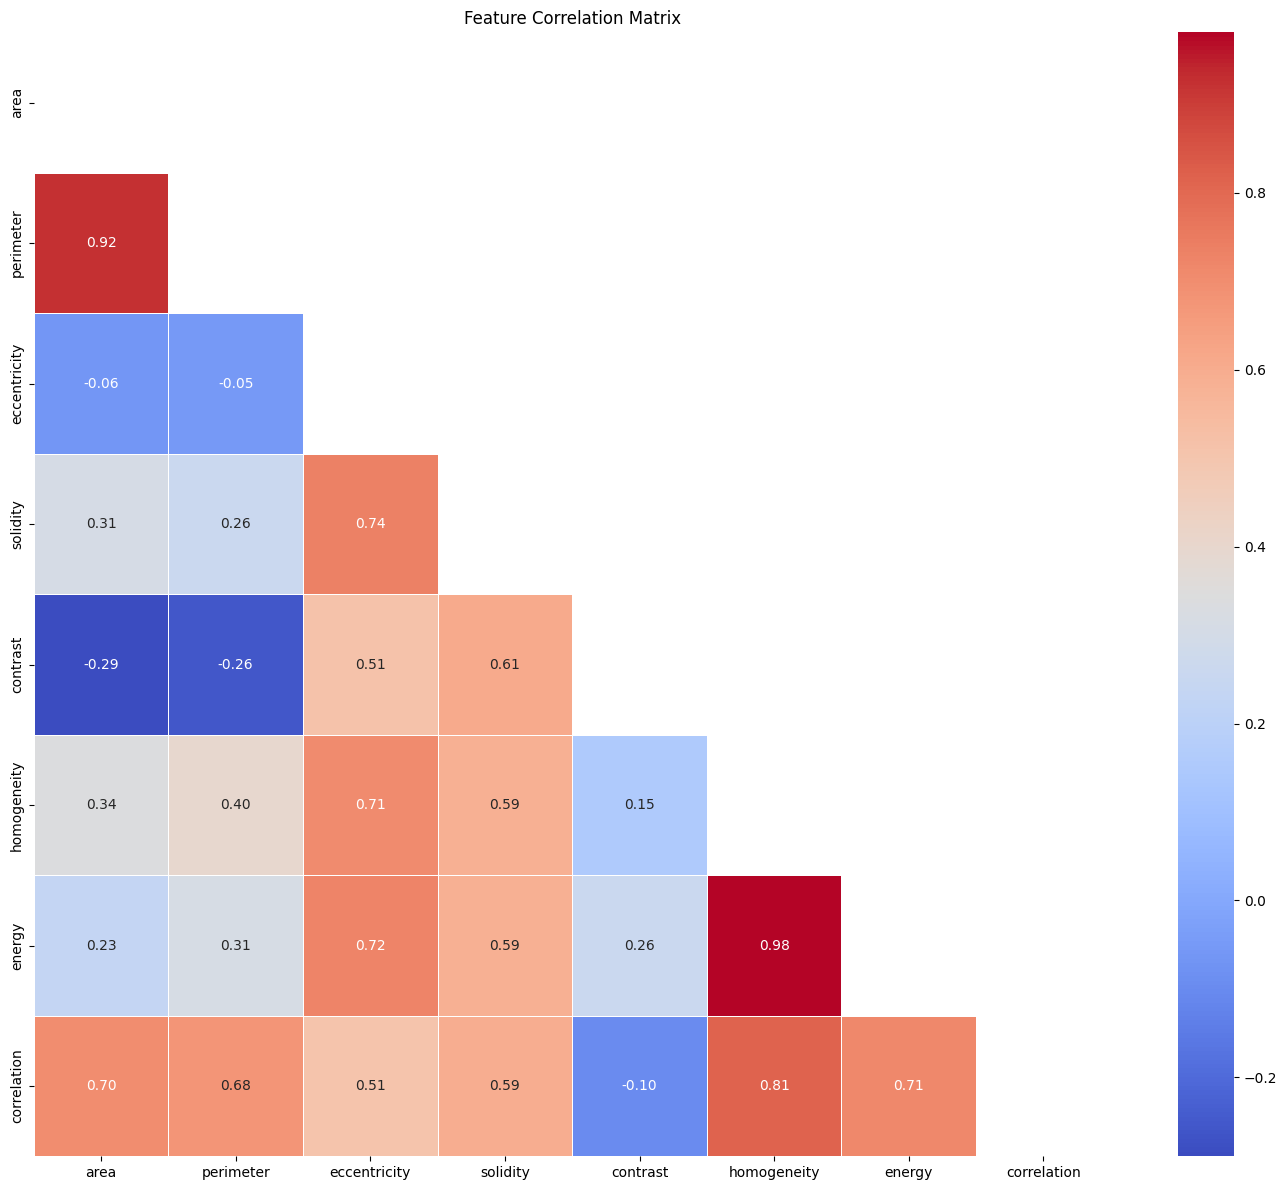

In [5]:
plt.figure(figsize=(14, 12))
correlation = features_df[numerical_features].corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, annot=True, mask=mask, cmap='coolwarm', 
            fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')

Analyse:

- `energy`, `correlation`, and `homogeneity` has high correlation with each other. So they created edges in bayesian network.
- `area` and `perimeter` has high correlation, thus created an edge in bayesian network.


## Visualization with PCA


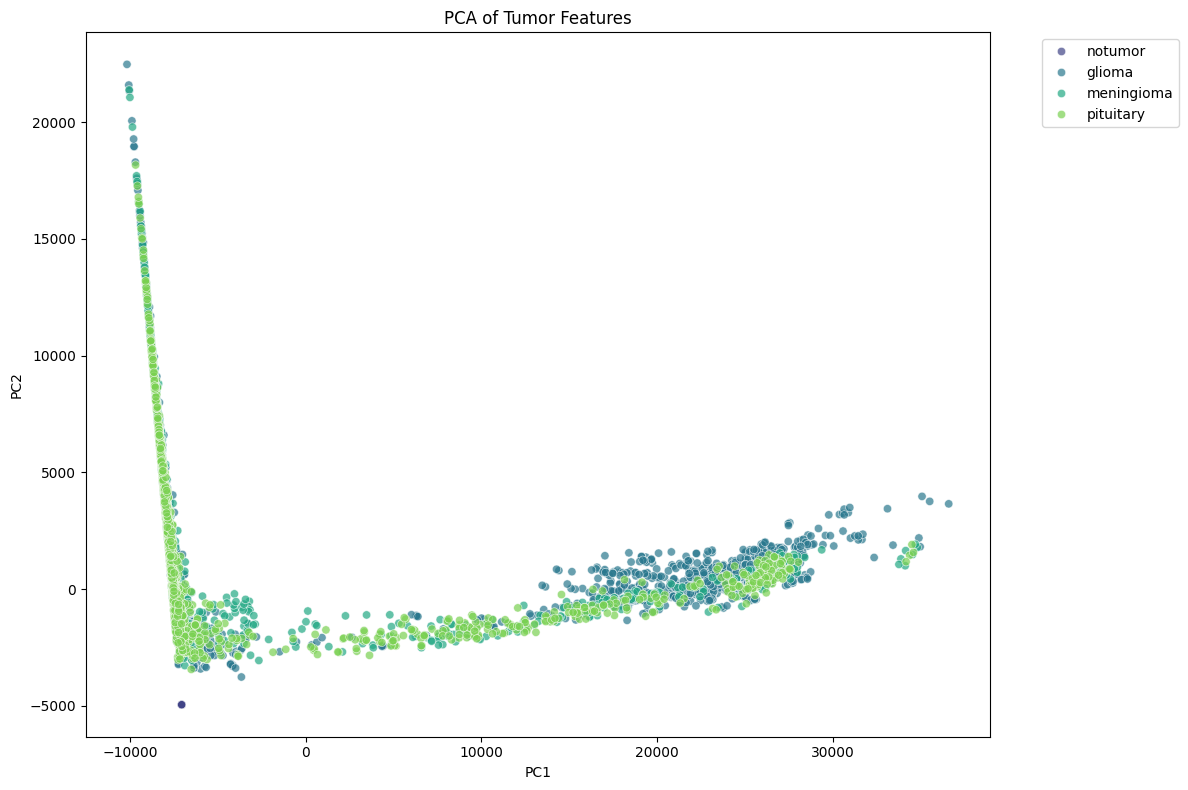

In [6]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_df[numerical_features])

# Create DataFrame for plotting
pca_df = pd.DataFrame({
    'PC1': pca_result[:, 0],
    'PC2': pca_result[:, 1],
    'Label': features_df['label']
})

# Plot PCA
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Label', data=pca_df, palette='viridis', alpha=0.7)
plt.title('PCA of Tumor Features')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('pca_visualization.png')